In [1]:
# References
# https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/  

In [2]:
from glob import glob
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gensim 
import plotly.graph_objects as pg

import string as st

from numpy import asarray
from numpy import zeros
from numpy import array
import re
from collections import Counter

# 3.0 : Data modelling : Reading all the csv files and concatenating them

In [3]:
# Read all files
stock_files = sorted(glob('*.csv'))
stock_files
df = pd.concat((pd.read_csv(file) for file in stock_files), ignore_index=True)

C:\Users\souse\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DtypeWarning:

Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\souse\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DtypeWarning:

Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\souse\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DtypeWarning:

Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
############################################################################################
# DROP COLUMNS
############################################################################################

df = df.drop(["external_author_id", "alt_external_id", "tweet_id", "new_june_2018", "article_url", "tco1_step1", \
             "tco2_step1", "tco3_step1"],axis=1)
df.shape

(2946207, 13)

# 3.0 : Data modelling : Converting all the tweet content in the content column to lowercase

In [5]:
############################################################################################
# CONVERT TWEETS TO LOWERCASE
############################################################################################
lowercase_tweets = []

for x in df['content']:
    if type(x) != "String":
        x = str(x)
    word_list = x.split()
    lower = [word.lower() for word in word_list]
    lowercase_tweets.append((" ").join(lower))
df["content"] = lowercase_tweets   

############################################################################################
#Remove # @ and http
############################################################################################    
hash_etc_del = []
for tweet in df["content"]:
    words = tweet.split()
    
    temp_list = []
    for word in words:
        
        if not (("#" in word) or ("@" in word) or ("http" in word) or ("https" in word)):
          
            temp_list.append(word)
        
            
            
    hash_etc_del.append((" ").join(temp_list))
        
df["content"] = hash_etc_del

# 4.2 : Sentiment Analysis : change words1 to words2 for sentiment analysis for the word "muslims"

In [45]:
#****************************************************************************************************************
#words1 and words2 contain the most similar words to guns an muslims, respectiely.
#The function filter_for_words returns true if the word from words1 matches any word in the sentence from the content column
#Note : Interchange the for loop between words1 and words2 to get the results for guns and muslims
#****************************************************************************************************************
words1 = ["gun", "guns", "gunfire", "handgun","firearm","firearms","rifle","pistol","shotgun","weapons","knife","guncontrol"]
words2 = ["muslim", "muslims", "islam", "islamist","pakistani","palestinian","islamic"]

def filter_for_words(sentence):
    
    for word in words1:
        if word in str(sentence):
            return True  
    return False

# 4.2 : Sentiment Analysis

In [46]:
#****************************************************************************************************************
#Proessing the content column to identify sentences that contain 
#the words from the list words1(related to guns) and from the list words2(related to muslims)
#Further filtering the results to create separate dataframes for account_types "Right" and "Left"
#****************************************************************************************************************
df= df.loc[df["language"] == "English"]
T_F_list = []

for tweet in df["content"]:
    if filter_for_words(tweet):
        T_F_list.append("True")
    else:
        T_F_list.append("False")
        
df["certain words"] = T_F_list

filtered_data1 = df.loc[(df["certain words"] == "True") & (df["account_type"]=="Right")]
filtered_data2 = df.loc[(df["certain words"] == "True") & (df["account_type"]=="Left")]

# 4.2 : Sentiment Analysis

In [47]:
#****************************************************************************************************************
#Importing Sentiment analysis library
#****************************************************************************************************************
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

# 4.2 : Sentiment Analysis

In [48]:
#****************************************************************************************************************
#Function for sentiment analysis on the different sentences filtered above for right and left account types
#****************************************************************************************************************
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

# 4.2 : Sentiment Analysis for "Right" account_type

In [49]:
#****************************************************************************************************************
#Processing the sentences for negative, positive and neutral sentiments. A user defined function call sentiment_analyzer_score() 
#is made to find the polarity of the sentence. For account_type "Right"
#****************************************************************************************************************
score = dict()
neg_score = 0
pos_score = 0
neu_score = 0

for sentence in filtered_data1["content"]:
    score = sentiment_analyzer_scores(sentence)
    
    if (score["compound"] < -0.05):
        neg_score += 1
    elif (score["compound"] >= 0.05):
        pos_score += 1
        #print("{:-<40} {}".format(sentence, str(score)))
    elif ((score["compound"] > -0.05) and (score["compound"] < 0.05)):
        neu_score += 1
        
print("Neg_score is ",neg_score)
print("Pos_score is ",pos_score)
print("Neu_score is ",neu_score)

Neg_score is  6951
Pos_score is  2285
Neu_score is  2058


# 4.2 : Sentiment Analysis : Plotting the visualization

In [50]:
#****************************************************************************************************************
#PLotting the sentiments for Right account_type
#****************************************************************************************************************
labels = ['Negative Sentiment','Positive Sentiment','Neutral Sentiment']
values = [neg_score,pos_score,neu_score]
fig = pg.Figure(data=[pg.Pie(labels=labels, values=values,hole = 0.1)])
fig.update_layout(title_text='"Right" sentiments about guns')
fig.show()

# 4.2 : Sentiment Analysis for "Left" account_type

In [51]:
#****************************************************************************************************************
#Processing the sentences for negative, positive and neutral sentiments. A user defined function call sentiment_analyzer_score() 
#is made to find the polarity of the sentence. For account_type "Left"
#****************************************************************************************************************
score = dict()
neg_score = 0
pos_score = 0
neu_score = 0

for sentence in filtered_data2["content"]:
    score = sentiment_analyzer_scores(sentence)
    
    if (score["compound"] < -0.05):
        neg_score += 1
    elif (score["compound"] >= 0.05):
        pos_score += 1
        #print("{:-<40} {}".format(sentence, str(score)))
    elif ((score["compound"] > -0.05) and (score["compound"] < 0.05)):
        neu_score += 1
        
print("Neg_score is ",neg_score)
print("Pos_score is ",pos_score)
print("Neu_score is ",neu_score)

Neg_score is  2355
Pos_score is  567
Neu_score is  506


# 4.2 : Sentiment Analysis : PLotting the visualization

In [52]:
#****************************************************************************************************************
#PLotting the sentiments for Left account_type
#****************************************************************************************************************
labels = ['Negative Sentiment','Positive Sentiment','Neutral Sentiment']
values = [neg_score,pos_score,neu_score]
fig = pg.Figure(data=[pg.Pie(labels=labels, values=values,hole = 0.3)])
fig.update_layout(title_text='"Left" sentiments about guns')

fig.show()

# 3.0 : Data modelling : Creating our corpus

In [10]:
#**********************
#Remove stop words
#**********************
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

stopwords_count = []
total_words = []
for tweet in df["content"]:
    
    word_list = tweet.split()
    total_words.append(word_list)


    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\souse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2.6 : Creating our word embeddings

In [12]:
#Bag of words #Bigrams
#Word embeddings
#Our corpus

model1 = gensim.models.Word2Vec(total_words, min_count = 1,  
                              size = 100, window = 5) 

# 2.6 

In [8]:
model1.wv.similarity('trump','hillary')

0.69050294

# 2.6

In [9]:
model1.wv.most_similar(positive=['hillary','republican'],negative=['trump'],topn=1)

[('democratic', 0.7783098816871643)]

# 2.6

In [10]:
model1.wv.most_similar(positive=['hillary','man'],negative=['trump'],topn=1)

[('woman', 0.7969727516174316)]

# 2.6

In [12]:
model1.wv.most_similar(positive=['hillary','guns'],negative=['trump'],topn=1)

[('guns,', 0.6262035965919495)]

# 4.1 : Similarity measures : Step 1

In [19]:
white_list = model1.wv.most_similar('muslim',topn=15)
for x in white_list:
     print(x[0])

refugee
muslims
christian
jewish
islam
islamist
sweden
syrian
immigrant
gay
sharia
isis
terrorist
jihad
palestinian


# 4.1 : Similarity measures : Step 2 (The next 11 blocks are related to this step)

In [13]:
labels = []
values = []
values.append(model1.wv.similarity('muslim','terrorist'))
labels.append('muslim')
print(labels)
print(values)

['muslim']
[0.67854]


In [14]:
values.append(model1.wv.similarity('white','terrorist'))
labels.append('white')

In [15]:
values.append(model1.wv.similarity('asian','terrorist'))
labels.append('asian')

In [16]:
values.append(model1.wv.similarity('chinese','terrorist'))
labels.append('chinese')

In [17]:
values.append(model1.wv.similarity('russian','terrorist'))
labels.append('russian')

In [18]:
values.append(model1.wv.similarity('italian','terrorist'))
labels.append('italian')

In [19]:
values.append(model1.wv.similarity('spanish','terrorist'))
labels.append('spanish')

In [20]:
values.append(model1.wv.similarity('indian','terrorist'))
labels.append('indian')

In [21]:
values.append(model1.wv.similarity('pakistani','terrorist'))
labels.append('pakistani')

In [22]:
values.append(model1.wv.similarity('christian','terrorist'))
labels.append('christian')

In [23]:
values.append(model1.wv.similarity('palestinian','terrorist'))
labels.append('palestinian')

In [24]:
print(labels)
print(values)

['muslim', 'white', 'asian', 'chinese', 'russian', 'italian', 'spanish', 'indian', 'pakistani', 'christian', 'palestinian']
[0.67854, 0.37530816, 0.27582902, 0.3589205, 0.42920005, 0.39534223, 0.35818484, 0.33309117, 0.49846527, 0.46538532, 0.57781947]


# 4.1 : Similarity measures : Plotting the visualization

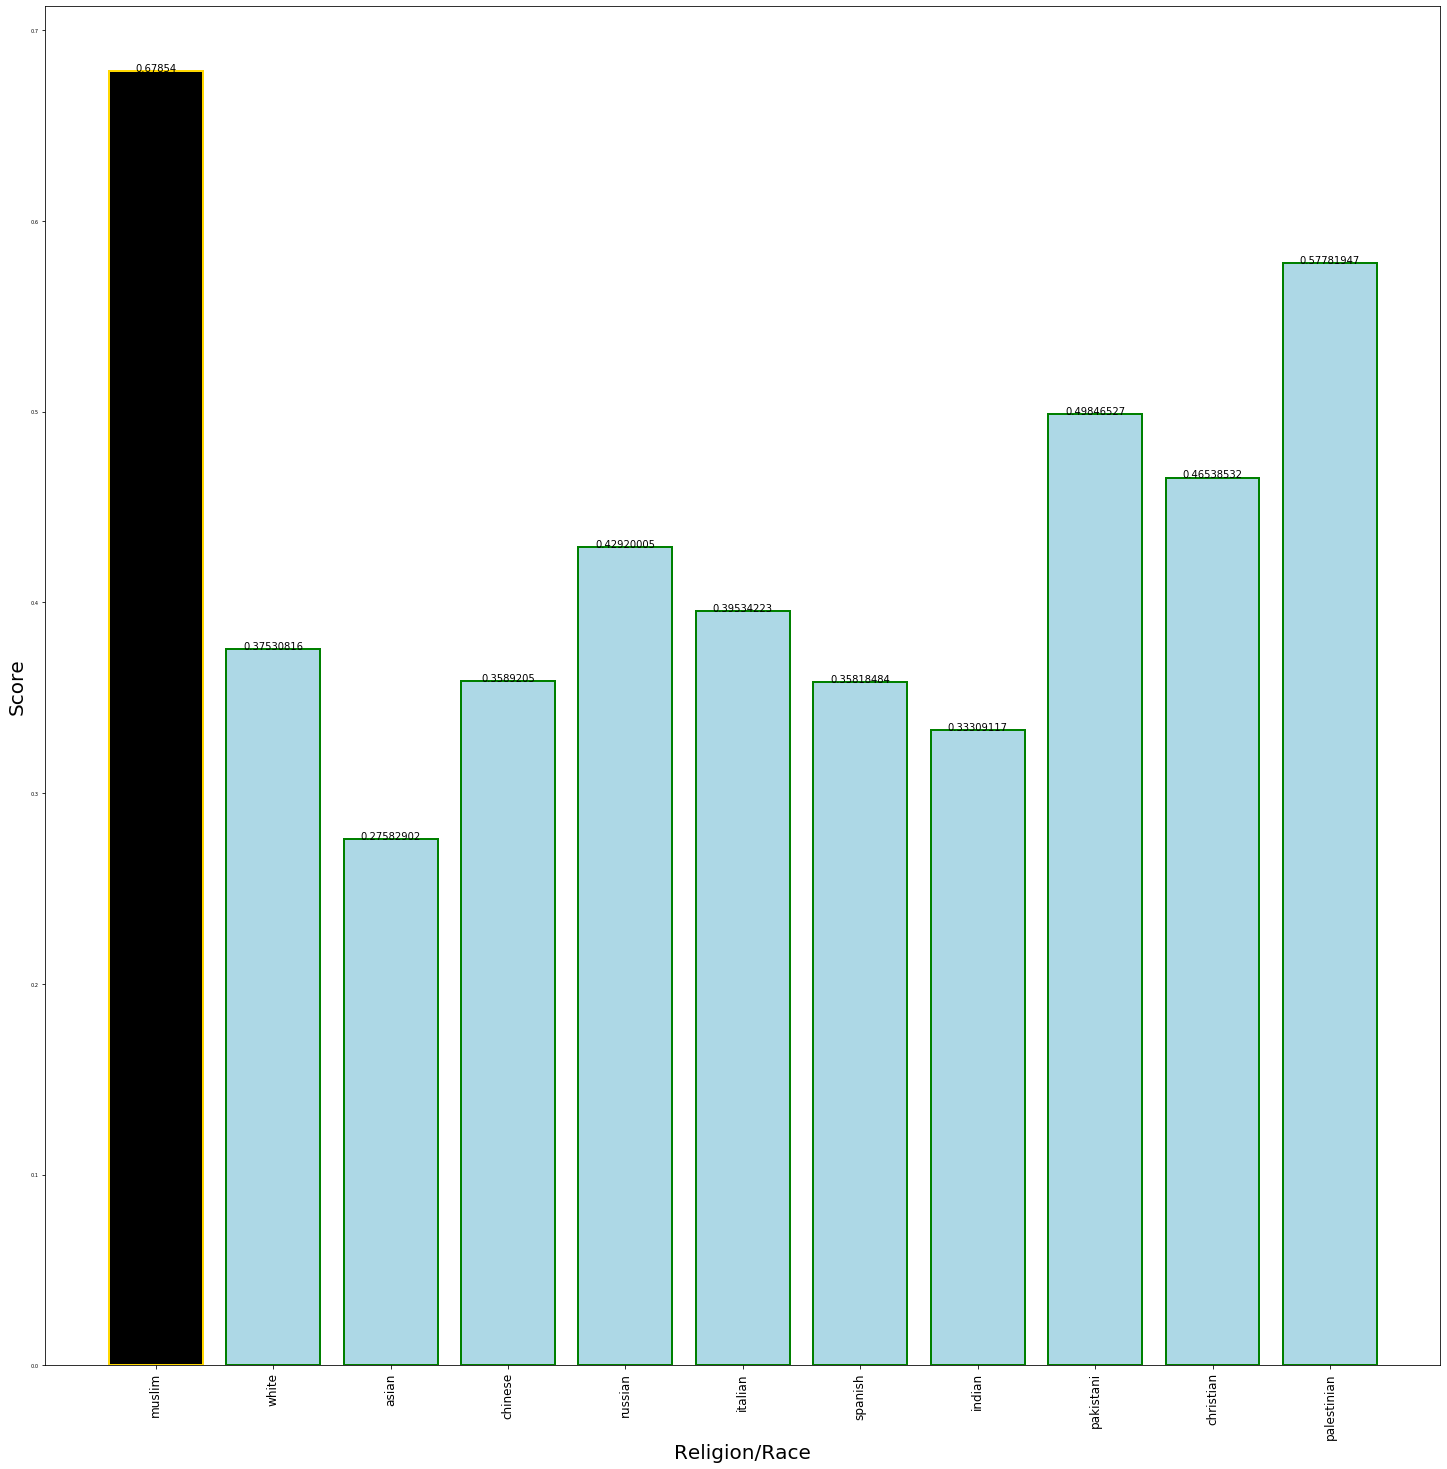

In [26]:
#********************************************************************************************
#PLotting the similarity scores between different religions/races and the word "terrorist"
#********************************************************************************************

import matplotlib.pyplot as mpl
mpl.rc('xtick',labelsize=5)
mpl.rc('ytick',labelsize=5)
mpl.xticks(
    rotation=90, 
    fontweight='light',
    fontsize=12
    )
mpl.xlabel('Religion/Race',size = 20)
mpl.ylabel('Score',size = 20)

mpl.bar(labels[0],values[0],color='black',edgecolor='gold',linewidth=2)
mpl.bar(labels[1:11],values[1:11],color='lightblue',edgecolor='green',linewidth=2)
for i,j in zip(labels,values):
    mpl.text(i,j,str(j),horizontalalignment='center')

mpl.rcParams["figure.figsize"] = (25,25)
mpl.show()


# 3.0 : Data modeeling : Using pre-trained embeddings in GoogleNews-vectors-negative300.bin

In [31]:
#Bag of words #Bigrams
#Word embeddings
#Pre-trained data

model2 = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)  

KeyboardInterrupt: 

# 3.3 : Advantages of corpus over pre-trained (the next four cells)

In [3]:
model2.wv.similarity('Trump','Hillary')

C:\Users\souse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



0.32598734

In [4]:
model2.wv.similarity('trump','Hillary')

C:\Users\souse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



0.1051766

In [5]:
model2.wv.similarity('Trump','hillary')

C:\Users\souse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



0.19601601

In [6]:
model2.wv.similarity('trump','hillary')

C:\Users\souse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



0.123253964

# 3.1 : Advantages of pre-trained over corpus : The table showing scores from pre-trained and corpus data (all the cells till the end)

In [27]:
model2.wv.similarity('muslim','terrorist')

C:\Users\souse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



0.3733778

In [28]:
model2.wv.similarity('white','terrorist')

C:\Users\souse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



0.06368202

In [29]:
model2.wv.similarity('asian','terrorist')

C:\Users\souse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



0.042464737

In [30]:
model2.wv.similarity('chinese','terrorist')

C:\Users\souse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



0.018268919

In [31]:
model2.wv.similarity('russian','terrorist')

C:\Users\souse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



0.060252946

In [32]:
model2.wv.similarity('italian','terrorist')

C:\Users\souse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



0.07185003

In [33]:
model2.wv.similarity('spanish','terrorist')

C:\Users\souse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



0.005757928

In [34]:
model2.wv.similarity('indian','terrorist')

C:\Users\souse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



0.11731905

In [35]:
model2.wv.similarity('pakistani','terrorist')

C:\Users\souse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



0.23754582

In [36]:
model2.wv.similarity('christian','terrorist')

C:\Users\souse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



0.23209321

In [38]:
model2.wv.similarity('palestinian','terrorist')

C:\Users\souse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



0.3148997